In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread, imshow

In [9]:
path = 'C:/Users/Gautam/Desktop'

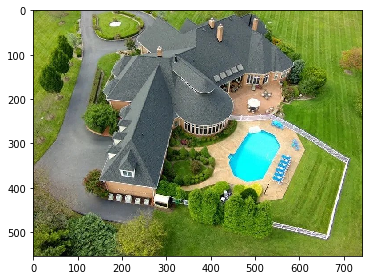

In [10]:
image1 = imread('{}/image.jpg'.format(path))
imshow(image1);

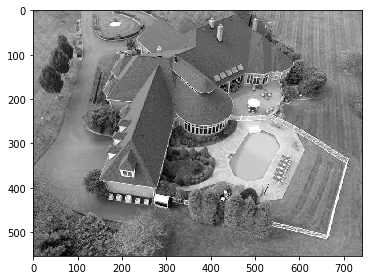

In [11]:
image2 = imread('{}/image.jpg'.format(path), as_gray=True)
imshow(image2);

In [12]:
print(image1.shape)
print(image2.shape)

(554, 743, 3)
(554, 743)


In [19]:
image1.shape

(554, 743, 3)

In [23]:
features = np.reshape(image1, (554*743*3))

In [24]:
features.shape, features

((1234866,), array([205, 220, 135, ..., 136, 141,  57], dtype=uint8))

### edge feature extraction.

In [27]:
from skimage import filters
from skimage.feature import canny

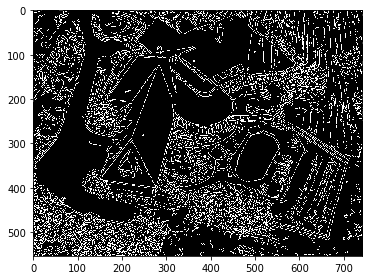

In [33]:
# Apply Canny detector 
coins_edges = canny(image2) 

# Sobel Kernel
ed_sobel = filters.sobel(image2)

imshow(coins_edges, cmap='gray');

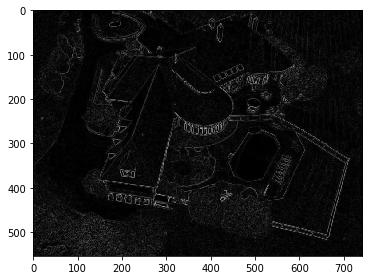

In [34]:
imshow(ed_sobel, cmap='gray');

There are many other kernels for edge feature extraction but these three are the most used ones. 

### Region-Based Segmentation

<ipython-input-40-ce9d028ec352>:2: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, hist_centers = histogram(image1)


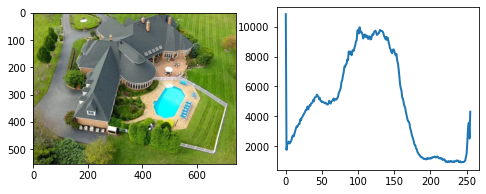

In [40]:
from skimage.exposure import histogram
hist, hist_centers = histogram(image1)
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
axes[0].imshow(image1, cmap=plt.cm.gray)
axes[1].plot(hist_centers, hist, lw=2)

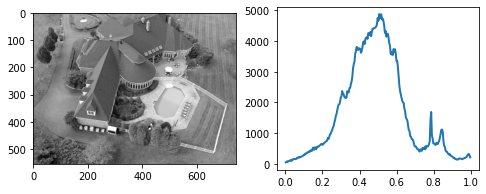

In [39]:
from skimage.exposure import histogram
hist, hist_centers = histogram(image2)
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
axes[0].imshow(image2, cmap=plt.cm.gray)
axes[1].plot(hist_centers, hist, lw=2)

In [41]:
import cv2

### Splitting the image into RGB and performing PCA

In [59]:
blue, green, red = cv2.split(image1)

In [60]:
from sklearn.decomposition import PCA

In [117]:
pca = PCA(300)

In [118]:
blue_transformed = pca.fit_transform(blue)
green_transformed = pca.fit_transform(green)
red_transformed = pca.fit_transform(red)

In [119]:
red_inverted = pca.inverse_transform(red_transformed)
green_inverted = pca.inverse_transform(green_transformed)
blue_inverted = pca.inverse_transform(blue_transformed)

In [120]:
#compressing the image

img_compressed = (np.dstack((green_inverted,red_inverted,blue_inverted))).astype(np.uint8)

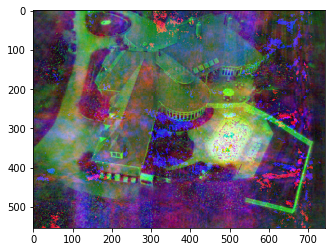

In [121]:
plt.imshow(img_compressed)